In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import h5py

In [2]:
DATA_PATH = '../data'
TRAIN_VALID_PATH = os.path.join(DATA_PATH, 'CheXpert-v1.0-small', 'train.csv')
TEST_PATH = os.path.join(DATA_PATH, 'CheXpert-v1.0-small', 'valid.csv')
H5_PATH = os.path.join(DATA_PATH, 'chexpert.h5')

In [3]:
full_train_valid_df = pd.read_csv(TRAIN_VALID_PATH)
full_test_df = pd.read_csv(TEST_PATH)

with h5py.File(H5_PATH, 'w') as h5:
    
    train_valid_group = h5.create_group('train_valid')
    for _, row in full_train_valid_df.iterrows():
        path = row.Path
        image_path = os.path.join(DATA_PATH, path)
        image = np.array(Image.open(image_path)).astype(np.uint8)
        train_valid_group.create_dataset(name=path, data=image, compression='gzip')
        
    test_group = h5.create_group('test')
    for _, row in full_test_df.iterrows():
        path = row.Path
        image_path = os.path.join(DATA_PATH, path)
        image = np.array(Image.open(image_path)).astype(np.uint8)
        test_group.create_dataset(name=path, data=image, compression='gzip')

(389, 320)


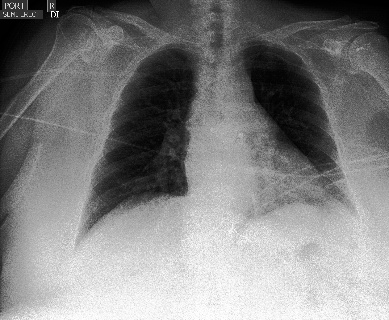

In [4]:
image_path = 'CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg'

with h5py.File(H5_PATH, 'r') as h5:
    image_array = h5[os.path.join('train_valid', image_path)][()]

image = Image.fromarray(image_array).convert('RGB')
print(image.size)
image